In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import random
import os

,name,type,variable,value,year,crime_type
105,"New York, New York",place,rate,314.930281,2009,Aggravated assault
39,"New York, New York",place,rate,5.606537,2009,Murder and nonnegligent manslaughter
122,"New York, New York",place,rate,9.903693,2009,Forcible rape
129,"New York, New York",place,rate,12.428020,2010,Forcible rape
83,"New York, New York",place,rate,327.603088,2010,Aggravated assault
52,"New York, New York",place,rate,6.429941,2010,Murder and nonnegligent manslaughter
138,"New York, New York",place,rate,13.297816,2011,Forcible rape
145,"New York, New York",place,rate,363.242256,2011,Aggravated assault
6,"New York, New York",place,rate,6.271406,2011,Murder and nonnegligent manslaughter
148,"New York, New York",place,rate,5.054639,2012,Murder and nonnegligent manslaughter


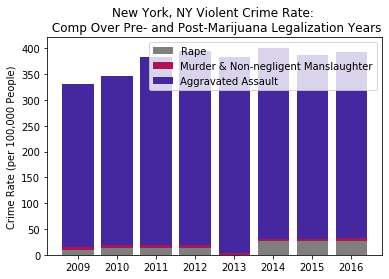

In [150]:
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

file_to_load1 = os.path.join("Output CSVs", "NYcrime.csv")

# load your city's CSV in a dataframe
NYcrimeDF = pd.read_csv(file_to_load1)

# filter whole NY dataset to just showing rates, not counts:
NYcrimeRates = NYcrimeDF.loc[NYcrimeDF["variable"] == "rate"]

# creating violent crime only set from there:
# restrict this violent crime set to a period of years useful for comparison w/ weed-legal cities:
NYcrimeRatesYears = NYcrimeRates.loc[NYcrimeRates["year"].isin(years)]
NYcrimeRatesYears = NYcrimeRatesYears.drop_duplicates()
# remove extraneous columns
NYcrimeRatesYears = NYcrimeRatesYears.drop(columns=["key", "id", "place_name"])
# sort the years to print in ascending order
NYcrimeRatesYears = NYcrimeRatesYears.sort_values(['year'], ascending=[True])

# create a list with the text of each violent-crime category and filter data again
Vcrime = ["Forcible rape", "Murder and nonnegligent manslaughter", "Aggravated assault", "Rape (revised definition)"]
NYcrimeRatesViolent = NYcrimeRatesYears.loc[NYcrimeRatesYears["crime_type"].isin(Vcrime)]

# Create seperate dataframes for each type of crime:

# create another category for the rape-specific crime types
rapeCategories = ["Forcible rape", "Rape (revised definition)"]
NYrape = NYcrimeRatesViolent.loc[NYcrimeRatesViolent["crime_type"].isin(rapeCategories)]
# set the index of each dataframe to the year the data was from
NYrape = NYrape.set_index(["year"])

NYmurder = NYcrimeRatesViolent.loc[NYcrimeRatesViolent["crime_type"] == "Murder and nonnegligent manslaughter"]
NYmurder = NYmurder.set_index(["year"])

NYassault = NYcrimeRatesViolent.loc[NYcrimeRatesViolent["crime_type"] == "Aggravated assault"]
NYassault = NYassault.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
NY_x_axis = NYrape.index
# each bar is a line here
p1 = plt.bar(NY_x_axis, NYrape["value"], color='black', alpha=0.5, align="center")
# the bottom arguments indicate where to start the second, third, etc bar in the set. From 2 on they become sums:
p2 = plt.bar(NY_x_axis, NYmurder["value"].values, color='#AD1457', bottom=NYrape["value"].values)
p3 = plt.bar(NY_x_axis, NYassault["value"].values, color='#4527A0', bottom=(NYmurder["value"] + NYrape["value"]).values)

tick_locations = [value for value in NY_x_axis]
plt.xticks(tick_locations, years)
plt.title("New York, NY Violent Crime Rate: \n Comp Over Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0]), ("Rape", "Murder & Non-negligent Manslaughter", "Aggravated Assault"))
NYcrimeRatesViolent

,name,type,variable,value,year,crime_type
3,"New York, New York",place,rate,1339.450609,2009,Larceny
119,"New York, New York",place,rate,1690.293679,2009,Property crime
16,"New York, New York",place,rate,223.547291,2009,Burglary
27,"New York, New York",place,rate,221.368955,2009,Robbery
150,"New York, New York",place,rate,127.295779,2009,Motor vehicle theft
93,"New York, New York",place,rate,1336.012155,2010,Larceny
40,"New York, New York",place,rate,235.220673,2010,Robbery
84,"New York, New York",place,rate,215.043135,2010,Burglary
108,"New York, New York",place,rate,1674.843648,2010,Property crime
68,"New York, New York",place,rate,123.788358,2010,Motor vehicle theft


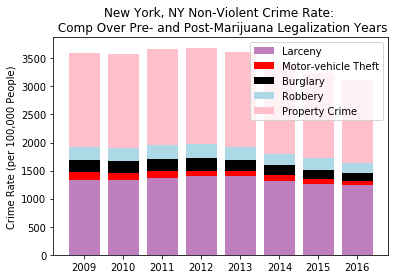

In [98]:
# Non-violent crime categorization for NY starts here:
# create non-violent crimes list
nonVcrime = ["Motor vehicle theft", "Larceny", "Burglary", "Robbery", "Property crime"]

# restricting new DataFrame to non-violent crimes in above list:
NYcrimeRatesNonViolent = NYcrimeRates.loc[NYcrimeRates["crime_type"].isin(nonVcrime)]
NYcrimeRatesNonViolent = NYcrimeRatesNonViolent.drop_duplicates()
NYcrimeRatesNonViolentYears = NYcrimeRatesNonViolent.loc[NYcrimeRatesNonViolent["year"].isin(years)]

# drop extraneous columns
NYcrimeRatesNVComparison = NYcrimeRatesNonViolentYears.drop(columns=["key", "id", "place_name"])
# sort year in ascending order
NYcrimeRatesNVComparison = NYcrimeRatesNVComparison.sort_values(['year'], ascending=[True])

# Create seperate dataframes for each type of crime:
NYlarceny = NYcrimeRatesNVComparison.loc[NYcrimeRatesNVComparison["crime_type"] == "Larceny"]
# set the index of each dataframe to the year
NYlarceny = NYlarceny.set_index(["year"])

NYmotor = NYcrimeRatesNVComparison.loc[NYcrimeRatesNVComparison["crime_type"] == "Motor vehicle theft"]
NYmotor = NYmotor.set_index(["year"])

NYburglary = NYcrimeRatesNVComparison.loc[NYcrimeRatesNVComparison["crime_type"] == "Burglary"]
NYburglary = NYburglary.set_index(["year"])

NYrobbery = NYcrimeRatesNVComparison.loc[NYcrimeRatesNVComparison["crime_type"] == "Robbery"]
NYrobbery = NYrobbery.set_index(["year"])

NYpropCrime = NYcrimeRatesNVComparison.loc[NYcrimeRatesNVComparison["crime_type"] == "Property crime"]
NYpropCrime = NYpropCrime.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
NY_x_axis = NYlarceny.index
# each bar is a line here
p1 = plt.bar(NY_x_axis, NYlarceny["value"], color='purple', alpha=0.5, align="center")
p2 = plt.bar(NY_x_axis, NYmotor["value"].values, color='red', bottom=NYlarceny["value"].values)
p3 = plt.bar(NY_x_axis, NYburglary["value"].values, color='black', bottom=(NYmotor["value"] + NYlarceny["value"]).values)
p4 = plt.bar(NY_x_axis, NYrobbery["value"].values, color="#ADD8E6", bottom = (NYmotor["value"] + NYlarceny["value"] + NYburglary["value"]).values)
p5 = plt.bar(NY_x_axis, NYpropCrime["value"].values, color='pink', bottom = (NYmotor["value"] + NYlarceny["value"] + NYburglary["value"] + NYrobbery["value"]).values)

tick_locations = [value for value in NY_x_axis]
plt.xticks(tick_locations, years)
plt.title("New York, NY Non-Violent Crime Rate: \n Comp Over Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("Larceny", "Motor-vehicle Theft", "Burglary", "Robbery", "Property Crime"))
NYcrimeRatesNVComparison

In [64]:
# created a series object with all-together sums of non-violent crime for NY, in case it's needed:
NYcrimeRatesNVComparison_gb = NYcrimeRatesNVComparison.groupby("year")
summedNV_NYcrime = NYcrimeRatesNVComparison_gb["value"].sum()
summedNV_NYcrime

year
2009    1911.662634
2010    1910.064321
2011    1951.198721
2012    1965.892647
2013    1919.230369
2014    1797.605788
2015    1716.856349
2016    1643.788541
Name: value, dtype: float64

,name,type,variable,value,year,crime_type
126,"Colorado Springs, Colorado",place,rate,490.008117,2009,Violent crime
54,"Colorado Springs, Colorado",place,rate,491.849424,2010,Violent crime
59,"Colorado Springs, Colorado",place,rate,440.190710,2011,Violent crime
164,"Colorado Springs, Colorado",place,rate,455.253107,2012,Violent crime
6,"Colorado Springs, Colorado",place,rate,434.066791,2013,Violent crime
62,"Colorado Springs, Colorado",place,rate,458.254766,2014,Violent crime
249,"Colorado Springs, Colorado",place,rate,438.319224,2015,Violent crime
213,"Colorado Springs, Colorado",place,rate,495.784432,2016,Violent crime


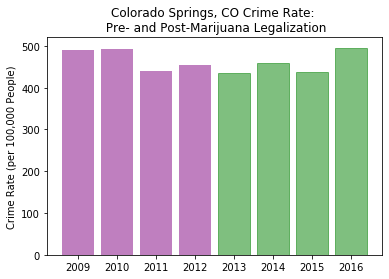

In [50]:
file_to_load2 = os.path.join("Output CSVs", "COcrime.csv")

COcrimeDF = pd.read_csv(file_to_load2)

COcrimeRates = COcrimeDF.loc[COcrimeDF["variable"] == "rate"]

COcrimeRatesViolent = COcrimeRates.loc[COcrimeRates["crime_type"] == "Violent crime"]
COcrimeRatesViolent = COcrimeRatesViolent.drop_duplicates()
COcrimeRatesViolentYears = COcrimeRatesViolent.loc[COcrimeRatesViolent["year"].isin(years)]
#COcrimeRatesViolentYears

#CO_prepost_legalization = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

COcrimePostLegalization = COcrimeRatesViolent.loc[COcrimeRatesViolent["year"].isin(years)]
COcrimePostLegalization = COcrimePostLegalization.drop(columns=["key", "id", "place_name"])
COcrimePostLegalization = COcrimePostLegalization.sort_values(['year'], ascending=[True])
COcrimePostLegalization

CO_x_axis = np.arange(len(COcrimePostLegalization["value"]))
postLegalCO = plt.bar(CO_x_axis, COcrimePostLegalization["value"], color='purple', alpha=0.5, align="center")
postLegalCO[4].set_color('g')
postLegalCO[5].set_color('g')
postLegalCO[6].set_color('g')
postLegalCO[7].set_color('g')

tick_locations = [value for value in CO_x_axis]
plt.xticks(tick_locations, years)
plt.title("Colorado Springs, CO Crime Rate: \n Pre- and Post-Marijuana Legalization")
plt.ylabel("Crime Rate (per 100,000 People)")
COcrimePostLegalization

In [5]:
CO_NYcrime = pd.merge(COcrimeRatesViolentYears, NYcrimeRatesViolentYears, how='outer', on=["name", "year", "type", "crime_type", "value", "variable"])

CO_NYcrime = CO_NYcrime.drop(columns=["key_x", "id_x", "key_y", "id_y", "place_name_y", "place_name_x"])
CO_NYcrime

,name,type,variable,value,year,crime_type
0,"Colorado Springs, Colorado",place,rate,434.066791,2013,Violent crime
1,"Colorado Springs, Colorado",place,rate,458.254766,2014,Violent crime
2,"Colorado Springs, Colorado",place,rate,495.784432,2016,Violent crime
3,"Colorado Springs, Colorado",place,rate,438.319224,2015,Violent crime
4,"New York, New York",place,rate,596.700141,2014,Violent crime
5,"New York, New York",place,rate,623.906787,2013,Violent crime
6,"New York, New York",place,rate,585.765574,2015,Violent crime
7,"New York, New York",place,rate,573.415150,2016,Violent crime


In [6]:
file_to_load3 = os.path.join("Output CSVs", "Fortworth.csv")

TXcrimeDF = pd.read_csv(file_to_load3)

TXcrimeRates = TXcrimeDF.loc[TXcrimeDF["variable"] == "rate"]

TXcrimeRatesViolent = TXcrimeRates.loc[TXcrimeRates["crime_type"] == "Violent crime"]
TXcrimeRatesViolent = TXcrimeRatesViolent.drop_duplicates()
TXcrimeRatesViolentYears = TXcrimeRatesViolent.loc[TXcrimeRatesViolent["year"].isin(years)]
TXcrimeRatesViolentYears

,key,id,name,type,variable,value,year,crime_type,place_name
49,1600000US4827000--2013--Violent crime--rate,1600000US4827000,"Fort Worth, Texas",place,rate,560.177939,2013,Violent crime,"Fort Worth, TX"
194,1600000US4827000--2016--Violent crime--rate,1600000US4827000,"Fort Worth, Texas",place,rate,526.266979,2016,Violent crime,"Fort Worth, TX"
240,1600000US4827000--2015--Violent crime--rate,1600000US4827000,"Fort Worth, Texas",place,rate,525.350987,2015,Violent crime,"Fort Worth, TX"
255,1600000US4827000--2017--Violent crime--rate,1600000US4827000,"Fort Worth, Texas",place,rate,560.207727,2017,Violent crime,"Fort Worth, TX"
267,1600000US4827000--2018--Violent crime--rate,1600000US4827000,"Fort Worth, Texas",place,rate,501.479151,2018,Violent crime,"Fort Worth, TX"


In [7]:
CO_TX_NY = pd.merge(CO_NYcrime, TXcrimeRatesViolentYears, how='outer', on=["name", "year", "type", "crime_type", "value", "variable"])

CO_TX_NY = CO_TX_NY.drop(columns=["key", "place_name", "id"])
CO_TX_NY

,name,type,variable,value,year,crime_type
0,"Colorado Springs, Colorado",place,rate,434.066791,2013,Violent crime
1,"Colorado Springs, Colorado",place,rate,458.254766,2014,Violent crime
2,"Colorado Springs, Colorado",place,rate,495.784432,2016,Violent crime
3,"Colorado Springs, Colorado",place,rate,438.319224,2015,Violent crime
4,"New York, New York",place,rate,596.700141,2014,Violent crime
5,"New York, New York",place,rate,623.906787,2013,Violent crime
6,"New York, New York",place,rate,585.765574,2015,Violent crime
7,"New York, New York",place,rate,573.415150,2016,Violent crime
8,"Fort Worth, Texas",place,rate,560.177939,2013,Violent crime
9,"Fort Worth, Texas",place,rate,526.266979,2016,Violent crime


,name,type,variable,value,year,crime_type
122,"Riverside, California",place,rate,511.886778,2009,Violent crime
125,"Riverside, California",place,rate,479.694162,2010,Violent crime
54,"Riverside, California",place,rate,426.095244,2011,Violent crime
25,"Riverside, California",place,rate,443.016981,2012,Violent crime
43,"Riverside, California",place,rate,420.323428,2013,Violent crime
110,"Riverside, California",place,rate,433.240571,2014,Violent crime
258,"Riverside, California",place,rate,446.041651,2015,Violent crime
215,"Riverside, California",place,rate,529.003118,2016,Violent crime
268,"Riverside, California",place,rate,508.805785,2017,Violent crime
289,"Riverside, California",place,rate,509.331706,2018,Violent crime


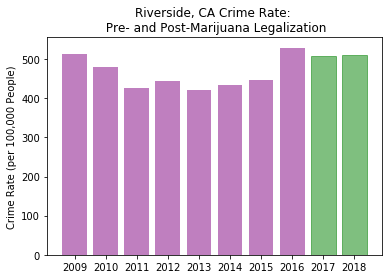

In [51]:
file_to_load4 = os.path.join("Output CSVs", "Riverside.csv")

CAcrimeDF = pd.read_csv(file_to_load4)

CAcrimeRates = CAcrimeDF.loc[CAcrimeDF["variable"] == "rate"]

CAcrimeRatesViolent = CAcrimeRates.loc[CAcrimeRates["crime_type"] == "Violent crime"]
CAcrimeRatesViolent = CAcrimeRatesViolent.drop_duplicates()
CAcrimeRatesViolentYears = CAcrimeRatesViolent.loc[CAcrimeRatesViolent["year"].isin(years)]
CAcrimeRatesViolentYears

#CA_prepost_legalization = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

CAcrimePostLegalization = CAcrimeRatesViolent.loc[CAcrimeRatesViolent["year"].isin(years)]
CAcrimePostLegalization = CAcrimePostLegalization.drop(columns=["key", "id", "place_name"])
CAcrimePostLegalization = CAcrimePostLegalization.sort_values(['year'], ascending=[True])
CAcrimePostLegalization

CA_x_axis = np.arange(len(CAcrimePostLegalization["value"]))
postLegalCA = plt.bar(CA_x_axis, CAcrimePostLegalization["value"], color='purple', alpha=0.5, align="center")
postLegalCA[8].set_color('g')
postLegalCA[9].set_color('g')

tick_locations = [value for value in CA_x_axis]
plt.xticks(tick_locations, years)
plt.title("Riverside, CA Crime Rate: \n Pre- and Post-Marijuana Legalization")
plt.ylabel("Crime Rate (per 100,000 People)")
CAcrimePostLegalization

In [13]:
CO_TX_NY_CA = pd.merge(CO_TX_NY, CAcrimeRatesViolentYears, how='outer', on=["name", "year", "type", "crime_type", "value", "variable"])

CO_TX_NY_CA = CO_TX_NY_CA.drop(columns=["key", "place_name", "id"])
CO_TX_NY_CA

,name,type,variable,value,year,crime_type
0,"Colorado Springs, Colorado",place,rate,434.066791,2013,Violent crime
1,"Colorado Springs, Colorado",place,rate,458.254766,2014,Violent crime
2,"Colorado Springs, Colorado",place,rate,495.784432,2016,Violent crime
3,"Colorado Springs, Colorado",place,rate,438.319224,2015,Violent crime
4,"New York, New York",place,rate,596.700141,2014,Violent crime
5,"New York, New York",place,rate,623.906787,2013,Violent crime
6,"New York, New York",place,rate,585.765574,2015,Violent crime
7,"New York, New York",place,rate,573.415150,2016,Violent crime
8,"Fort Worth, Texas",place,rate,560.177939,2013,Violent crime
9,"Fort Worth, Texas",place,rate,526.266979,2016,Violent crime


Weed legalized in CA and OR all of 2017 and 2018. Weed legalized in CO all of 2013 onwards.

Bar graphs clustered by city showing one bar per year in ascending order, bar height reflecting rate per 100,000ppl.


In [24]:
# pos = list(range(len(CO_TX_NY_CA['value']))) 
# width = 0.25

# fig, ax = plt.subplots(figsize=(10,5))
# plt.bar(pos, CO_TX_NY_CA.loc[CO_TX_NY_CA["year"] == 2013], width, alpha=0.5, color='#EE3224')

[2013 2014 2016 2015 2017 2018]


In [14]:
CO_TX_NY_CA_2013 = CO_TX_NY_CA.loc[CO_TX_NY_CA["year"] == 2013]
CO_TX_NY_CA_2013

,name,type,variable,value,year,crime_type
0,"Colorado Springs, Colorado",place,rate,434.066791,2013,Violent crime
5,"New York, New York",place,rate,623.906787,2013,Violent crime
8,"Fort Worth, Texas",place,rate,560.177939,2013,Violent crime
13,"Riverside, California",place,rate,420.323428,2013,Violent crime


In [15]:
CO_TX_NY_CA_2014 = CO_TX_NY_CA.loc[CO_TX_NY_CA["year"] == 2014]
CO_TX_NY_CA_2014

,name,type,variable,value,year,crime_type
1,"Colorado Springs, Colorado",place,rate,458.254766,2014,Violent crime
4,"New York, New York",place,rate,596.700141,2014,Violent crime
14,"Riverside, California",place,rate,433.240571,2014,Violent crime
